In [17]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pip install pandas-datareader
#pip install fix_yahoo_finance
import fix_yahoo_finance as yf

import os

In [18]:
from pandas_datareader import data as pdr


yf.pdr_override() # <== that's all it takes :-
#BTCUSD=X
data = pdr.get_data_yahoo("BBVA", start="2012-05-01", end="2018-06-01")
data.to_csv('BBVAyahoo.csv')

[*********************100%***********************]  1 of 1 downloaded


In [19]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-17,7.85,7.89,7.84,7.87,7.87,1078100
2018-05-18,7.74,7.76,7.69,7.71,7.71,1299100
2018-05-21,7.67,7.67,7.61,7.65,7.65,1466400
2018-05-22,7.75,7.80,7.75,7.77,7.77,1944100
2018-05-23,7.52,7.60,7.49,7.57,7.57,4178600
2018-05-24,7.51,7.51,7.42,7.48,7.48,3417300
2018-05-25,7.18,7.24,7.10,7.23,7.23,3319900
2018-05-29,6.82,6.91,6.65,6.69,6.69,5487100
2018-05-30,6.87,6.93,6.80,6.89,6.89,5156800


In [20]:
# Compute the returns using the Closing price 
data['ret'] = np.log(data['Close'] / data['Close'].shift(1))

# Compute Volatility using the pandas rolling standard deviation function
data['Volatility'] = pd.rolling_std(data['ret'], window=252) * np.sqrt(252)
data['vwap'] = (data['Close']*data['Volume']).cumsum()/data['Volume'].cumsum()
data['t'] = range (1,len(data)+1)
print(data.head(10))

            Open  High   Low  Close  Adj Close   Volume       ret  Volatility  \
Date                                                                            
2012-04-30  6.85  6.86  6.72   6.75   4.979754  1028000       NaN         NaN   
2012-05-01  6.81  6.85  6.76   6.83   5.038772   970700  0.011782         NaN   
2012-05-02  6.41  6.53  6.38   6.50   4.795319  2190900 -0.049522         NaN   
2012-05-03  6.41  6.46  6.35   6.39   4.714167  2153900 -0.017068         NaN   
2012-05-04  6.57  6.64  6.51   6.56   4.839584  3000200  0.026256         NaN   
2012-05-07  6.70  6.93  6.69   6.91   5.097791  2185600  0.051979         NaN   
2012-05-08  6.88  6.93  6.77   6.86   5.060905  1851400 -0.007262         NaN   
2012-05-09  6.36  6.55  6.34   6.48   4.780564  2526800 -0.056987         NaN   
2012-05-10  6.92  6.96  6.79   6.81   5.024018  2319400  0.049672         NaN   
2012-05-11  6.56  6.84  6.54   6.69   4.935490  3859600 -0.017778         NaN   

                vwap   t  


C:\Users\junaj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  """


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DEEDF5710>,
      dtype=object)

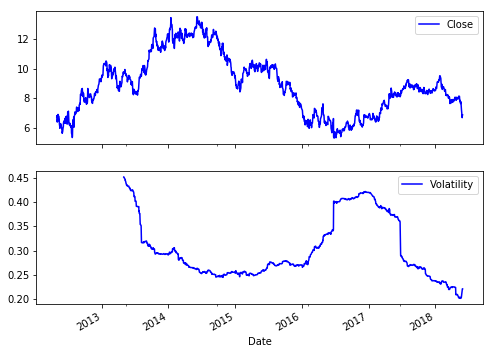

In [21]:
%matplotlib inline
# Plot the NIFTY Price series and the Volatility
data[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

C:\Users\junaj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\junaj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=200,min_periods=199,adjust=True,ignore_na=False).mean()
  # Remove the CWD from sys.path while we load stuff.


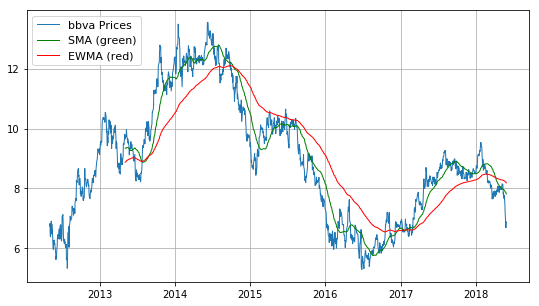

In [22]:
%matplotlib inline
# Simple Moving Average 
def SMA(data, ndays): 
 SMA = pd.Series(pd.rolling_mean(data['Close'], ndays), name = 'SMA') 
 data = data.join(SMA) 
 return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
 EMA = pd.Series(pd.ewma(data['Close'], span = ndays, min_periods = ndays - 1), 
 name = 'EWMA_' + str(ndays)) 
 data = data.join(EMA) 
 return data

# Compute the 50-day SMA for bbva
n = 50
SMA_bbva = SMA(data,n)
SMA_bbva = SMA_bbva.dropna()
SMA = SMA_bbva['SMA']

# Compute the 200-day EWMA for NIFTY
ew = 200
EWMA_bbva = EWMA(data,ew)
EWMA_bbva = EWMA_bbva.dropna()
EWMA = EWMA_bbva['EWMA_200']

# Plotting the NIFTY Price Series chart and Moving Averages below
plt.figure(figsize=(9,5))
plt.plot(data['Close'],lw=1, label='bbva Prices')
plt.plot(SMA,'g',lw=1, label='SMA (green)')
plt.plot(EWMA,'r', lw=1, label='EWMA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)

In [23]:
#Beta it measures the volatility of any security with respect to the overall market volatility

In [24]:

data1 = pdr.get_data_yahoo("BBVA", start="2016-01-01", end="2018-01-06")
data1.columns = [str(col) + '_bbva' for col in data1.columns]
data2 = pdr.get_data_yahoo("^IBEX", start="2016-01-01", end="2018-01-06")
data2.columns = [str(col) + '_ibex' for col in data2.columns]
df_all=pd.concat([data1, data2], axis=1)
df_all.dropna(inplace=True)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [25]:
df_all.head(2)

,Open_bbva,High_bbva,Low_bbva,Close_bbva,Adj Close_bbva,Volume_bbva,Open_ibex,High_ibex,Low_ibex,Close_ibex,Adj Close_ibex,Volume_ibex
Date,,,,,,,,,,,,
2016-01-04,7.21,7.24,7.08,7.23,6.331314,3052200.0,9429.799805,9440.900391,9263.700195,9313.200195,9313.19043,279173100.0
2016-01-05,7.23,7.24,7.11,7.19,6.296285,2738500.0,9431.500000,9446.200195,9260.200195,9335.200195,9335.19043,208637600.0


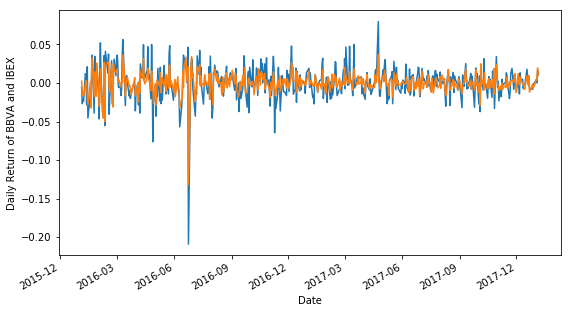

In [26]:
# We will plot the returns of Google and S&P500 against each other
%matplotlib inline
plt.figure(figsize=(9,5))
return_1 = np.log(df_all['Close_bbva'] / df_all['Close_bbva'].shift(1))
return_2 = np.log(df_all['Close_ibex'] / df_all['Close_ibex'].shift(1))
return_1.dropna().plot()
return_2.dropna().plot()
plt.ylabel("Daily Return of BBVA and IBEX")
plt.show()

502 502
alpha: 9.02363491185181e-05
beta: 1.325925743677744


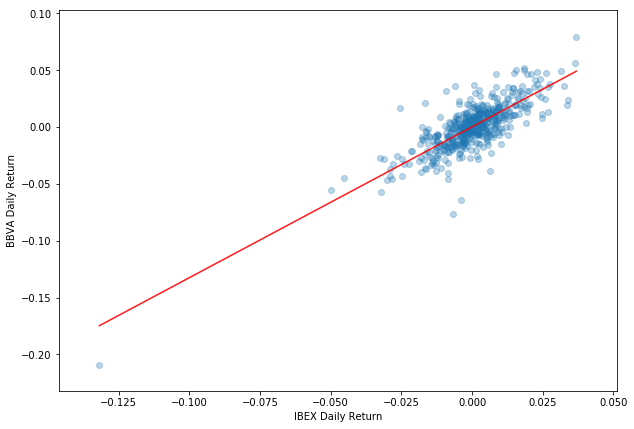

In [27]:
#Rasset = alpha + beta of asset *  Rbenchmark  + ei
%matplotlib inline
import statsmodels.api as sm
from statsmodels import regression



X = return_2.dropna().values
Y = return_1.dropna().values
print(len(X),len(Y))

def linreg(x,y):

    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
 
    # We are removing the constant
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print ('alpha: ' + str(alpha))
print ('beta: ' + str(beta))


# In[82]:

X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(10,7))
plt.scatter(X, Y, alpha=0.3) # Plot the raw data
plt.xlabel("IBEX Daily Return")
plt.ylabel("BBVA Daily Return")

plt.plot(X2, Y_hat, 'r', alpha=0.9)

plt.show()
